# Raport - metody głębokiego uczenia - pd 1.

Autorzy: Olaf Skrabacz, Tymoteusz Makowski

## Wczytanie pakietów

In [1]:
import numpy as np
import pandas as pd
from NeuralNetwork import NeuralNetwork
from Layer import Layer
from utils import plot_decision_surface
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML
sns.set_style("darkgrid")
np.random.seed(1337)

## Regresja

### Zbiór 1  - XOR

Wczytajmy dane.

In [2]:
df = pd.read_csv("Classification//data.XOR.train.1000.csv")
df_test = pd.read_csv("Classification//data.XOR.test.1000.csv")

Wizualizacjia zbiorów.

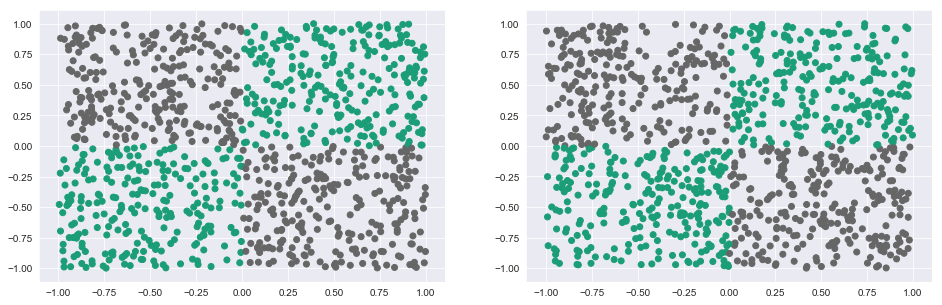

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
pass

Jak widać zbiory są dla człowieka łatwo separowalne, rozkłady na zbiorach testowych i treningowych są takie same, zatem nie powinno być problemu z rozwiązaniem tego problemu przez sieć.

In [4]:
X = df[['x','y']].values
X_test = df_test[['x','y']].values
y = df['cls'].values.reshape(-1,1) - 1
y_test = df_test['cls'].values.reshape(-1,1) - 1

Trzeba pamiętać by klasy były w zbiorze {0,1}, ponieważ takie założenie przyjmuję funkcja błedu oraz jej pochodna.

In [16]:
nn = NeuralNetwork(loss="cross_entropy", momentum=0.9)
nn.add(Layer(units=30, input_shape=2, activation_function="sigmoid"))
nn.add(Layer(units=15, input_shape=30, activation_function="sigmoid"))
nn.add(Layer(units=1, input_shape=15, activation_function="sigmoid"))

Zobaczmy jak zmienia się powierzchnia decyzyjna w zależności od liczby epoków.

99

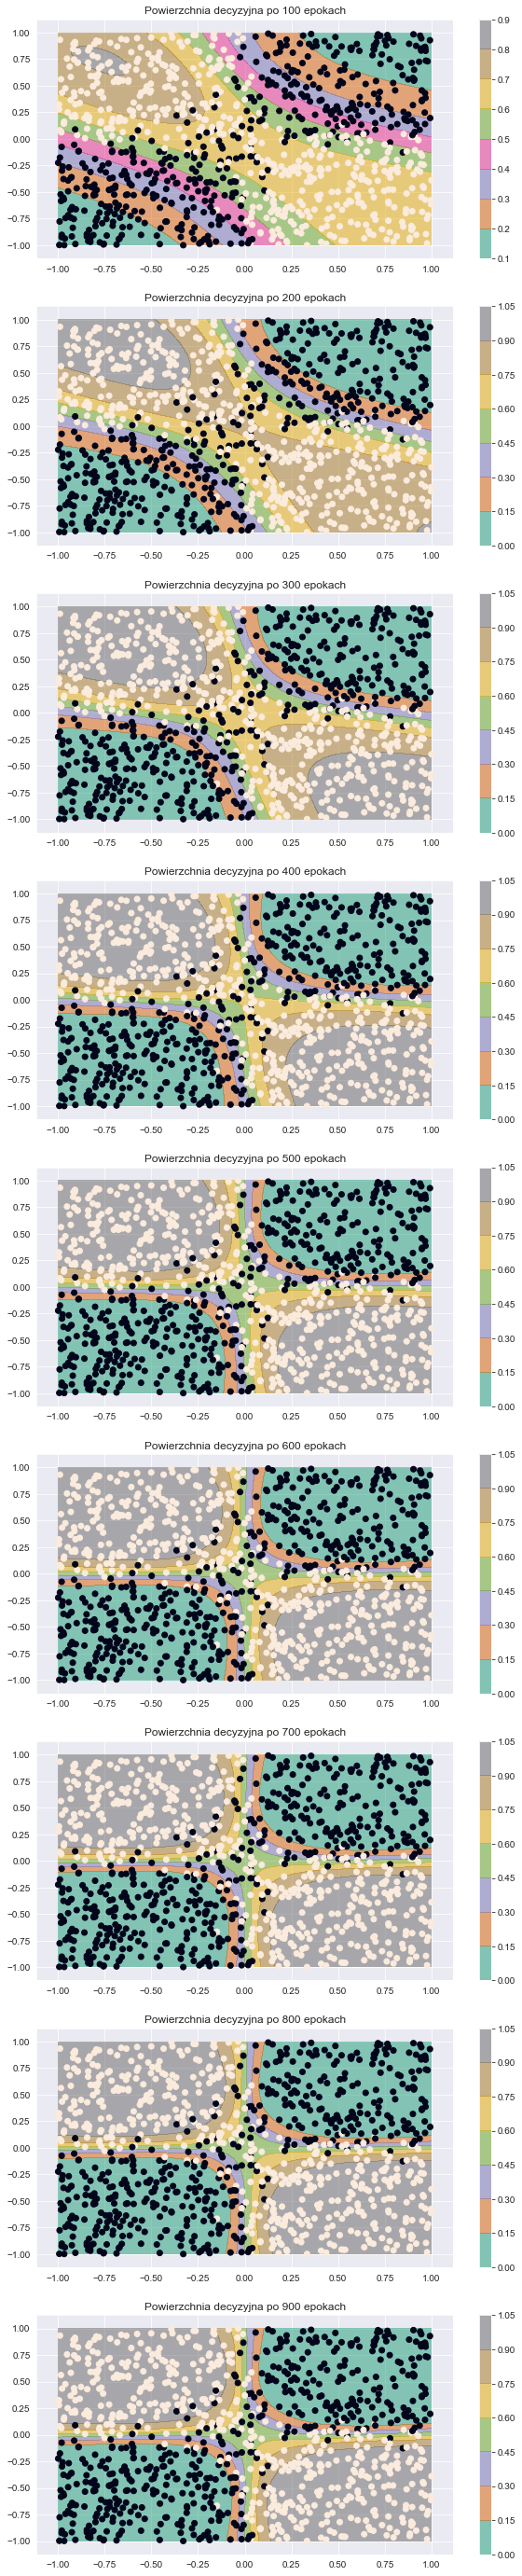

In [17]:
fig, axs = plt.subplots(9, 1, figsize=(10,50))
for i in range(1,10):
    loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=100, learning_rate=1e-0, momentum=0.9)
    im = plot_decision_surface(nn, df_test, proba=True,axis=axs[i-1], cmap='Dark2', alpha=0.5)
    fig.colorbar(im, ax = axs[i-1])
    axs[i-1].scatter(df_test['x'], df_test['y'], c=df_test['cls'])
    axs[i-1].set_title(f"Powierzchnia decyzyjna po {i*100} epokach")
    pass
    

Jak widać sieć z kolejnymi epokami jest coraz bardziej pewna swojej predykcji. Dodatkowo widać, że w miejscu stku obu klas sieć jest dużo mniej pewna niż w obszarze gdzie są obiekty tylko jednej klasy.

### Zbiór 2 - noisy XOR

In [13]:
df = pd.read_csv("Classification//data.noisyXOR.train.1000.csv")
df_test = pd.read_csv("Classification/data.noisyXOR.test.1000.csv")

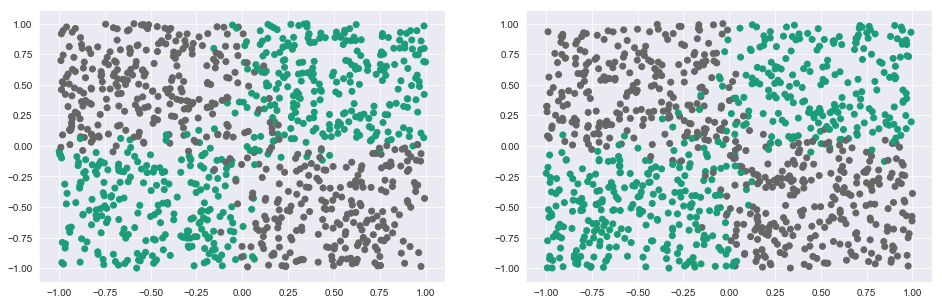

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y'], c=df['cls'], cmap='Dark2')
plt.subplot(1, 2, 2)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'], cmap='Dark2')
pass

Mamy do czynienia z zaszumioną wersją poprzedniego zbioru. Zobaczmy jak zmieni to powierzchnie decyzyjną w porównaniu do poprzedniego problemu.

In [23]:
X = df[['x','y']].values
X_test = df_test[['x','y']].values
y = df['cls'].values.reshape(-1,1) - 1
y_test = df_test['cls'].values.reshape(-1,1) - 1

In [29]:
nn = NeuralNetwork(loss="cross_entropy", momentum=0.9)
nn.add(Layer(units=30, input_shape=2, activation_function="sigmoid"))
nn.add(Layer(units=15, input_shape=30, activation_function="sigmoid"))
nn.add(Layer(units=1, input_shape=15, activation_function="sigmoid"))

899

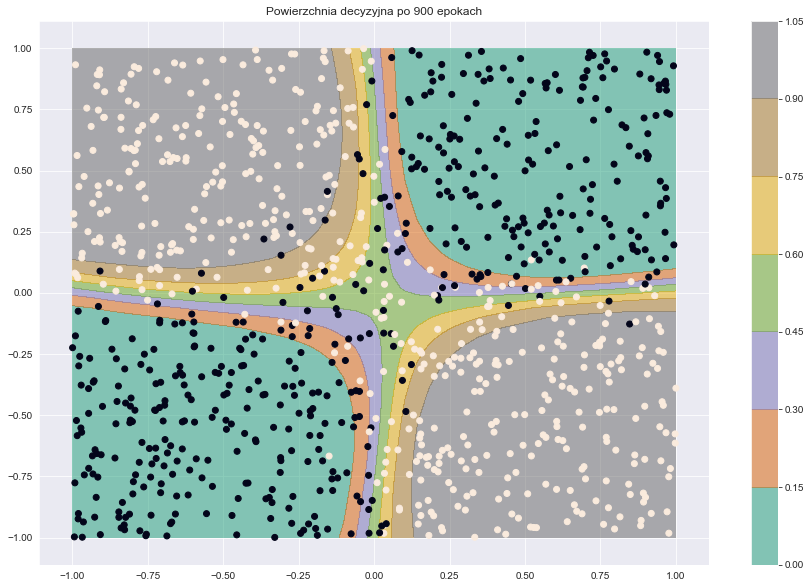

In [30]:
plt.figure(figsize=(15,10))
loss, test_loss, grad_norm = nn.train(X, y, X_test, y_test, epochs=900, learning_rate=1e-0, momentum=0.9)
im = plot_decision_surface(nn, df_test, proba=True, cmap='Dark2', alpha=0.5)
plt.colorbar(im)
plt.scatter(df_test['x'], df_test['y'], c=df_test['cls'])
plt.title(f"Powierzchnia decyzyjna po {900} epokach")
pass

Widać, że powierzchnia deyzyjna na tym zbiorze wygląda podobnie do poprzedniej, jednak główną różnicą jest szersza przestrzeń, gdzie model nie jest pewny klasy, ponieważ został dodany tam szum.